In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/ethanjohn/Desktop/Data Science/Projects/MentalHealthDashboard/Students_Social_Media_Addiction_FE.csv")
df.columns


Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score', 'Usage_Hrs_Level',
       'Sleep_Deficit', 'Platform_Categories', 'Addicted_Score_Levels',
       'Wellbeing_Score', 'Relationship_Status_Encoded',
       'Affects_Academic_Performance_Encoded', 'Academic_Level_Encoded',
       'Gender_Encoded', 'Academic_Risk_Index'],
      dtype='object')

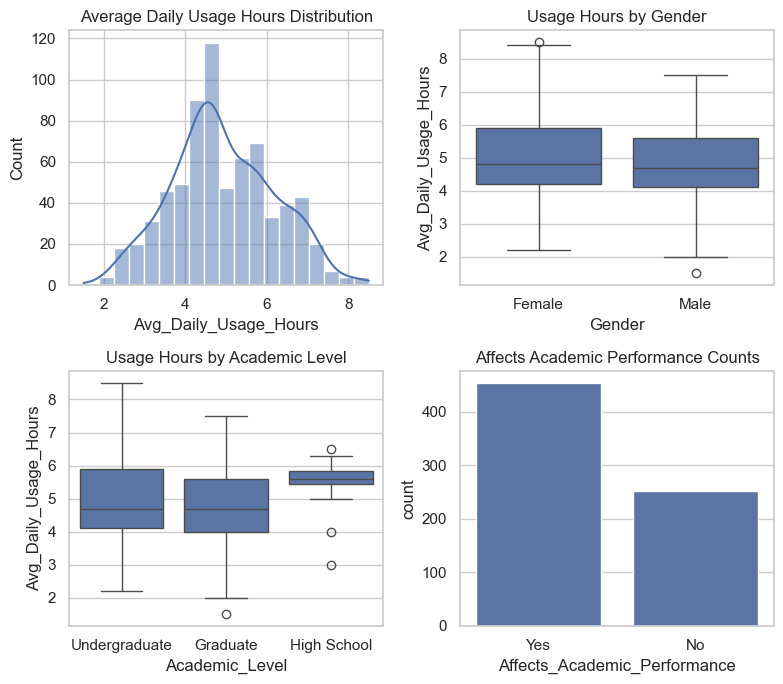

In [2]:
#General Usage Patterns
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))


sns.histplot(x="Avg_Daily_Usage_Hours",data=df, kde=True, ax=axes[0,0])
axes[0,0].set_title("Average Daily Usage Hours Distribution")



sns.boxplot(x="Gender", y = "Avg_Daily_Usage_Hours", data=df, ax=axes[0,1])
axes[0,1].set_title("Usage Hours by Gender")

sns.boxplot(x="Academic_Level", y = "Avg_Daily_Usage_Hours", data=df,ax=axes[1,0])
axes[1,0].set_title("Usage Hours by Academic Level")

sns.countplot(x = df["Affects_Academic_Performance"],ax=axes[1,1])
axes[1,1].set_title("Affects Academic Performance Counts")


plt.tight_layout()

In [14]:
corr = df.corr(numeric_only=True)

threshold = 0.5
high_corr_pairs = (
    corr.where(abs(corr) >= threshold)
        .stack()              # drop NaNs
        .reset_index()
)

high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# remove duplicates (A,B) vs (B,A)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]

high_corr_pairs.sort_values(by="Correlation", ascending=False)


,Feature1,Feature2,Correlation
25,Mental_Health_Score,Wellbeing_Score,0.950092
38,Addicted_Score,Conflicts_Over_Social_Media,0.933586
17,Sleep_Hours_Per_Night,Wellbeing_Score,0.872006
42,Addicted_Score,Affects_Academic_Performance_Encoded,0.866049
63,Affects_Academic_Performance_Encoded,Conflicts_Over_Social_Media,0.832030
35,Addicted_Score,Avg_Daily_Usage_Hours,0.832000
68,Academic_Level_Encoded,Age,0.824932
6,Avg_Daily_Usage_Hours,Conflicts_Over_Social_Media,0.804582
8,Avg_Daily_Usage_Hours,Sleep_Deficit,0.790582
40,Addicted_Score,Sleep_Deficit,0.764858


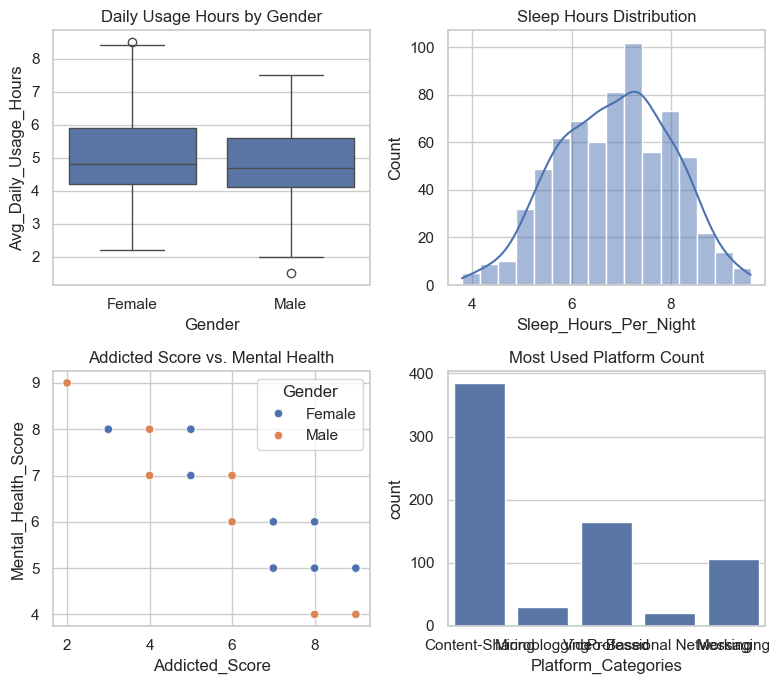

In [21]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))

sns.boxplot(x=df["Gender"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Daily Usage Hours by Gender")


sns.histplot(df["Sleep_Hours_Per_Night"],kde=True, ax=axes[0,1])
axes[0,1].set_title("Sleep Hours Distribution")

sns.scatterplot(
    x=df["Addicted_Score"],
    y = df["Mental_Health_Score"], 
    hue=df["Gender"], 
    ax = axes[1,0]
    )
axes[1,0].set_title("Addicted Score vs. Mental Health")

sns.countplot(
    x = df["Platform_Categories"],
    ax = axes[1,1]
)
axes[1,1].set_title("Most Used Platform Count")
#axes[1,1].ticks_params(axis = "x", rotation=45)

plt.tight_layout()
plt.show()


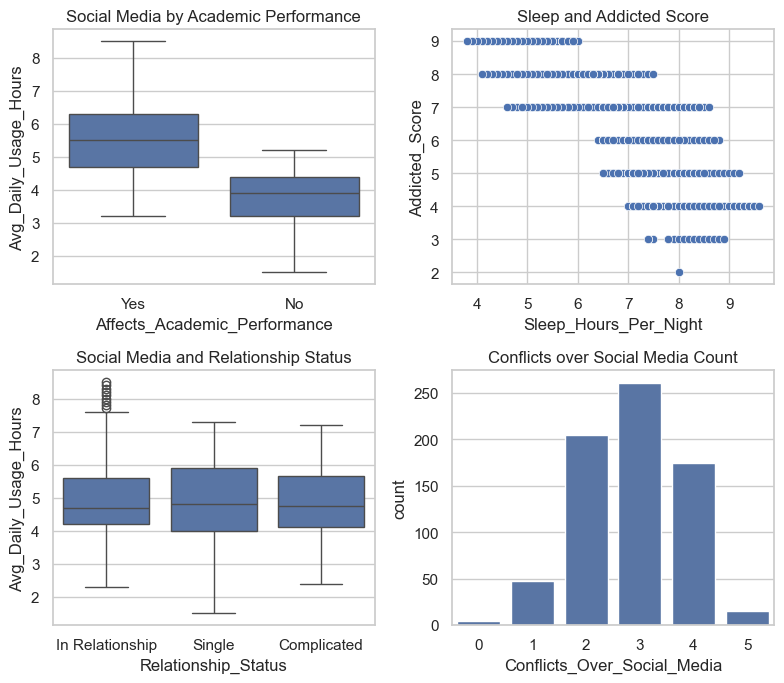

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))


sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Social Media by Academic Performance")

sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Addicted_Score"], ax=axes[0,1])
axes[0,1].set_title("Sleep and Addicted Score")

sns.boxplot(x=df["Relationship_Status"], y=df["Avg_Daily_Usage_Hours"], ax=axes[1,0])
axes[1,0].set_title("Social Media and Relationship Status")

sns.countplot(x=df["Conflicts_Over_Social_Media"], ax=axes[1,1])
axes[1,1].set_title("Conflicts over Social Media Count")

plt.tight_layout()
plt.show()



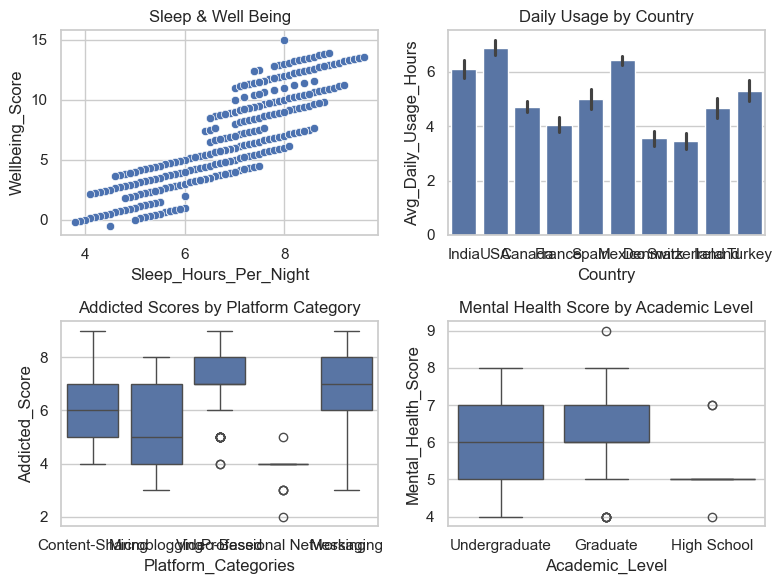

In [5]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,6))


sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Wellbeing_Score"], ax=axes[0,0])
axes[0,0].set_title("Sleep & Well Being")

country_counts = df["Country"].value_counts()
countries_keep = country_counts[country_counts >= 25].index

df_filtered = df[df["Country"].isin(countries_keep)]

sns.barplot(x= df_filtered["Country"], y=df_filtered["Avg_Daily_Usage_Hours"], data=df_filtered, ax=axes[0,1])
axes[0,1].set_title("Daily Usage by Country")

sns.boxplot(x=df["Platform_Categories"], y=df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Scores by Platform Category")

sns.boxplot(x=df["Academic_Level"], y=df["Mental_Health_Score"], ax=axes[1,1])
axes[1,1].set_title("Mental Health Score by Academic Level")


plt.tight_layout()
plt.show()


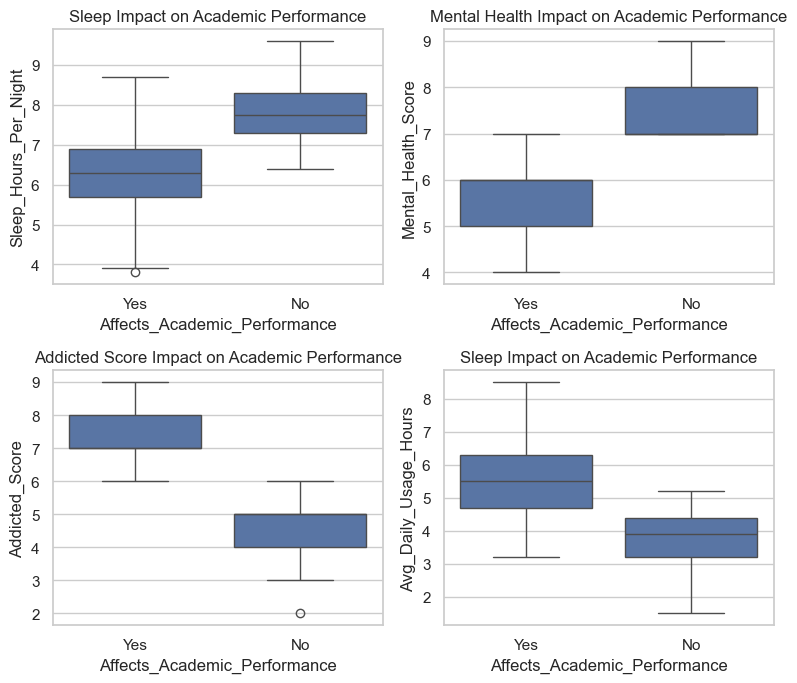

In [ ]:
# Graphs about academic performance

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))

# Compare affects_academic performance (yes/no) with these variables: Sleep, Mental Health, Addicted, Daily Hours

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Sleep_Hours_Per_Night"], ax=axes[0,0])
axes[0,0].set_title("Sleep Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Mental_Health_Score"], ax=axes[0,1])
axes[0,1].set_title("Mental Health Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Score Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[1,1])
axes[1,1].set_title("Sleep Impact on Academic Performance")

plt.tight_layout()
plt.show()


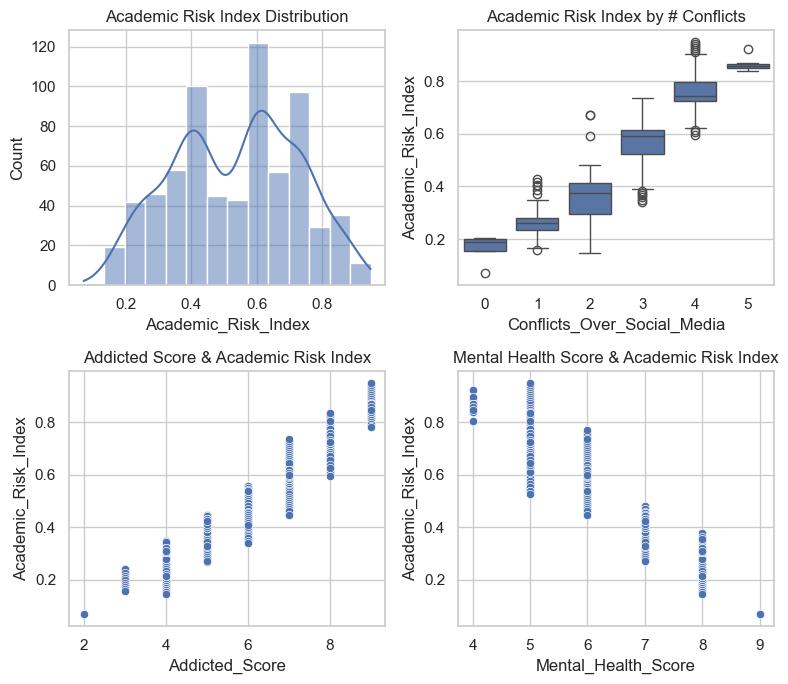

In [ ]:
# Graphs about Academic Risk Index (feature engineered column)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2,figsize=(8,7))

sns.histplot(x="Academic_Risk_Index", data=df,kde=True,ax=axes[0,0])
axes[0,0].set_title("Academic Risk Index Distribution")

sns.boxplot(x="Conflicts_Over_Social_Media",y="Academic_Risk_Index",data=df,ax=axes[0,1])
axes[0,1].set_title("Academic Risk Index by # Conflicts")

sns.scatterplot(x="Addicted_Score",y="Academic_Risk_Index",data=df,ax=axes[1,0])
axes[1,0].set_title("Addicted Score & Academic Risk Index")

sns.scatterplot(x="Mental_Health_Score",y="Academic_Risk_Index",data=df,ax=axes[1,1])
axes[1,1].set_title("Mental Health Score & Academic Risk Index")

plt.tight_layout()


In [27]:
ari_corr = df.corr(numeric_only=True)["Academic_Risk_Index"].sort_values(ascending=False)
print(ari_corr)

Academic_Risk_Index                     1.000000
Addicted_Score                          0.963601
Avg_Daily_Usage_Hours                   0.917972
Conflicts_Over_Social_Media             0.900059
Sleep_Deficit                           0.874832
Affects_Academic_Performance_Encoded    0.808369
Gender_Encoded                          0.057646
Student_ID                              0.047144
Relationship_Status_Encoded             0.039883
Age                                    -0.154865
Academic_Level_Encoded                 -0.181926
Sleep_Hours_Per_Night                  -0.874832
Mental_Health_Score                    -0.941235
Wellbeing_Score                        -0.992856
Name: Academic_Risk_Index, dtype: float64


In [25]:
aap_corr = df.corr(numeric_only=True)["Affects_Academic_Performance_Encoded"].sort_values(ascending=False)
print(aap_corr)

Affects_Academic_Performance_Encoded    1.000000
Addicted_Score                          0.866049
Conflicts_Over_Social_Media             0.832030
Academic_Risk_Index                     0.808369
Avg_Daily_Usage_Hours                   0.661474
Sleep_Deficit                           0.625373
Student_ID                              0.053780
Gender_Encoded                          0.024736
Academic_Level_Encoded                 -0.091373
Relationship_Status_Encoded            -0.115705
Age                                    -0.137140
Sleep_Hours_Per_Night                  -0.625373
Mental_Health_Score                    -0.808921
Wellbeing_Score                        -0.830285
Name: Affects_Academic_Performance_Encoded, dtype: float64
